## Implement a simple deep neural network (DNN) for solving the polynomial equation 𝑦 = 5𝑥^3 − 10x^2 − 20𝑥 + 10 with the following specifications-
1. Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.
2. Generate training samples within the range of -20 to +20. Use an appropriate method for normalizing the training data in the range of -1 to +1.
3. Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with an appropriate number of epochs.
4. Display the training accuracy vs validation accuracy and training error vs validation error curves.

## Import Modules

In [38]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

## 1. Build the Model
Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.

In [39]:
inputs = Input((1,), name= 'input_layer')
x = Dense(32, activation= 'relu')(inputs)
x = Dense(64, activation= 'relu')(x)
x = Dense(128, activation= 'relu')(x)
outputs = Dense(1, name= 'output_layer')(x)

model = Model(inputs, outputs, name= 'deep_neural_network')
model.summary()

Model: "deep_neural_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

## 2. Generate training samples
Generate training samples within the range of -20 to +20. Use an appropriate method for normalizing the training data in the range of -1 to +1.

In [40]:
x = np.random.uniform(-20, 20, 10000)   #inputs
y = 5*x*x*x - 10*x*x -20*x + 10         #outputs

x_data = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_data = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

## 3. Spliting generated samples
Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with an appropriate number of epochs.

In [41]:
size = len(x_data)
train_x, train_y = x_data[ : int(size*0.9)], y_data[ : int(size*0.9)]
validate_x, validate_y = x_data[int(size*0.9) : int(size*0.95)], y_data[int(size*0.9) : int(size*0.95)]
test_x, test_y = x_data[int(size*0.95) : ], y_data[int(size*0.95) : ]

## Plotting the datasets

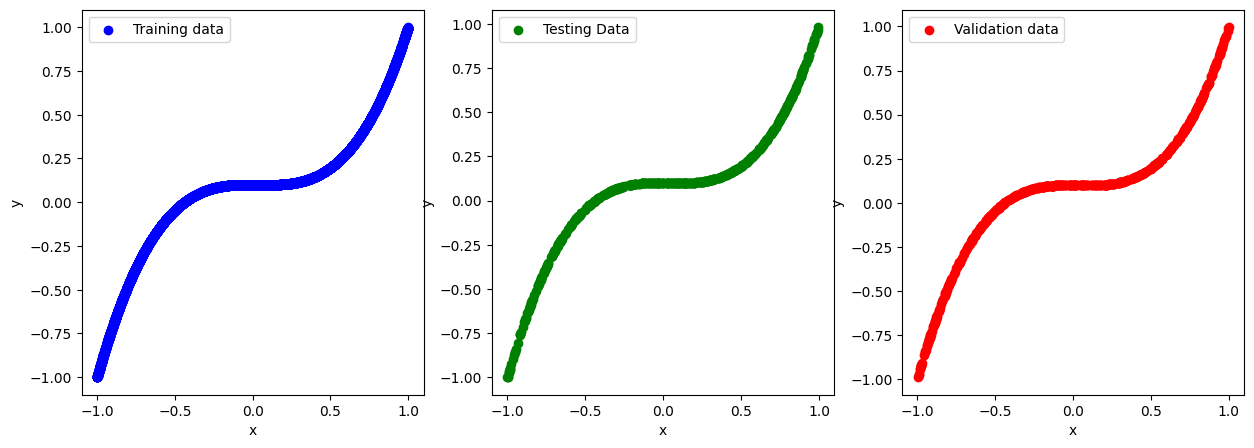

In [42]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(train_x, train_y, label = "Training data", color = "blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(test_x, test_y, label = "Testing Data", color = "green")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(validate_x, validate_y, label = "Validation data", color = "red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

## Train the model

In [43]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', 
              metrics = [tf.keras.metrics.R2Score(name = 'accuracy')])
trained_model = model.fit(train_x, train_y, batch_size = 32, 
                          validation_data = (validate_x, validate_y), epochs = 50)
training_history = trained_model.history

Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8079 - loss: 0.0260 - val_accuracy: 0.9985 - val_loss: 2.1733e-04
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 1.4024e-04 - val_accuracy: 0.9997 - val_loss: 4.7608e-05
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 2.7232e-05 - val_accuracy: 0.9999 - val_loss: 1.2580e-05
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 1.6818e-05 - val_accuracy: 0.9998 - val_loss: 3.3335e-05
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 1.1678e-05 - val_accuracy: 0.9999 - val_loss: 1.3314e-05
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.7921e-06 - val_accuracy: 0.9992 - val_loss: 1.2039e-04
Epoch 7/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 7.4415e-05 - val_accuracy: 0.9999 - val_loss: 1.2087e-05
Epoch 8/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

## 4. Display result
Display the training accuracy vs validation accuracy and training error vs validation error curves.

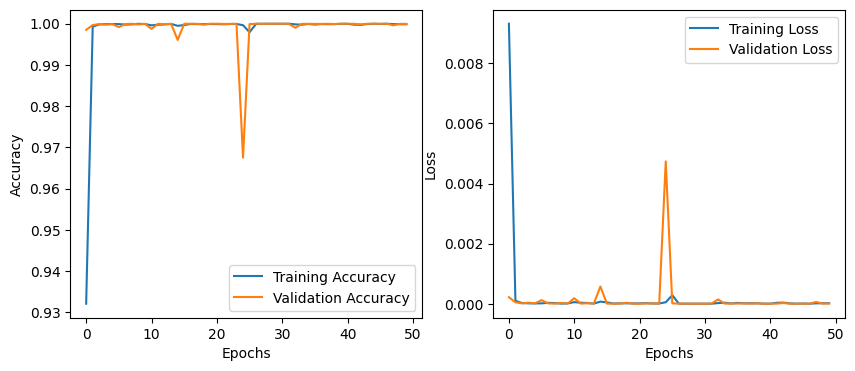

In [44]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(training_history["accuracy"])
plt.plot(training_history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"])

plt.subplot(1, 2, 2)
plt.plot(training_history["loss"])
plt.plot(training_history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])

plt.show()

## Evaluate the model

In [45]:
model.evaluate(test_x, test_y)
predict_y = model.predict(test_x)

print("Original" + "\t\t" + "Predicted")
for i in range(10):
    print(test_y[i], "\t", predict_y[i][0])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 7.5099e-06 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Original		Predicted
-0.02658827920218776 	 -0.027560841
0.10069056372201834 	 0.097858325
0.09868726520935556 	 0.097181804
0.11211374074797575 	 0.11005737
0.10069952273342664 	 0.097847305
0.8027001463326224 	 0.79902136
0.05094187504485315 	 0.050439537
-0.43964868096325627 	 -0.4450144
-0.0033320352974194334 	 -0.0042595547
0.13434673119609375 	 0.13320853
